In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Create and play with the properties of a quantum object

In [2]:
# Create a random operator as a 2x2 square matrix
Operator1 = Qobj([[1, 2], [2, 4]])
print(Operator1)

# Create a random state as a 2 vector
State1 = Qobj([[1], [2]])
print(State1)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 2.]
 [2. 4.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]]


In [3]:
# Generate some useful operators

H = Qobj([[1, 2, 3, 4], [1, 2, 3, 4],[1, 2, 3, 4],[1, 2, 3, 4]])
e, s = H.groundstate()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip\core\qobj.py:1626: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


In [4]:
print(e, s)

0j Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.98198051]
 [-0.10910895]
 [-0.10910895]
 [-0.10910895]]


In [5]:
#   Tensor notation
g = basis(2, 0)     # Ground state is (1, 0), basis(2,0) means a "2" dim vector with 1 being at the "0"th index
n = basis(2, 1)

a = destroy(2)      # Make the annihilation and excitation operators
sig_p = create(2)

e = (sig_p*g)       # Act excitation on ground
n_1 = (a*n)         # Act annihilation on n photons


print('atom g', g.full())
print('light n', n.full())
print('atom e', e.full())
print('light n-1', n_1.full())

e_n_1 = tensor(e, n_1)  # Encode by making this |e, n-1>


# We can achieve the same e_n_1 as above directly using tensors:
# instead of applying sig_p on g and a on n directly, I make sig_p X a and g X n
# (where X is tensor product) and apply one to the other
g_n = tensor(g, n)
e_n_1_tens = tensor(sig_p, a)*g_n


# Comparing the results to find they are the same
print('tens', e_n_1_tens.full())
print('no tens', e_n_1.full())

atom g [[1.+0.j]
 [0.+0.j]]
light n [[0.+0.j]
 [1.+0.j]]
atom e [[0.+0.j]
 [1.+0.j]]
light n-1 [[1.+0.j]
 [0.+0.j]]
tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]
no tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]


In [6]:
# Making the hamiltonian

# N = number of photons, thus number of "possible" atom states, but of course only
# two is accessible (ground and n), and we do not allow further excitation. Thus
# still work in 2 dimensions, but N is used for scaling?
N = 10
a = destroy(2)
a_dag = a.dag()
sig_p = create(2)
sig_m = destroy(2)
sigma_z = tensor(sigmaz(), qeye(2)) # making sigmaz a tensor that only applies on the atom, not light
                                  # because qeye is the identity matrix, and in this program:
                                  # (A X B)(gXn) --> Ag X Bn if A and B applies on g and n only, respectively
Count_op = tensor(qeye(2), a_dag*a)

wa = 1 # atom frequency
wc = 2 # photon frequency
Omega = 1 # Rabi oscillation frequency


H_JC = wa/2 * sigma_z + wc*Count_op + Omega/2 * (tensor(sig_p, a) + tensor(sig_m, a_dag))

print(H_JC.eigenstates())
print(H_JC.eigenenergies())


(array([-0.58113883,  0.5       ,  1.5       ,  2.58113883]), array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[ 0.        ]
        [-0.16018224]
        [ 0.98708746]
        [ 0.        ]]                                                             ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[1.]
        [0.]
        [0.]
        [0.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.]
        [0.]
        [0.]
        [1.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.        ]
        [0.98708746]
        [0.16018224]
        [0.        ]]                                           

In [7]:
print(Count_op * g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [8]:
sig = tensor(sigmaz(), qeye(2))
print(e_n_1)

print(sig*e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [ 0.]
 [-1.]
 [ 0.]]


In [9]:
print(g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [10]:
print(e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


Making N photon states (ofc only 2 is accessible)

In [11]:
N = 2 # number of photon states (number of photons + 1(no photon state) )
g = basis(2, 0)
n = basis(N, N-1)

e = basis(2, 1)
n_1 = basis(N, N-2)

g_n = tensor(g, n)
e_n_1 = tensor(e, n_1)


sigma_z = tensor(sigmaz(), qeye(N))
a = tensor(qeye(2), destroy(N))
a_dag = a.dag()
sig_p = tensor(create(2), qeye(N))
sig_m = sig_p.dag()

int_excitation = tensor(create(2), destroy(N))
int_deexcitation = tensor(destroy(2), create(N))
int_perturn = tensor(destroy(2), destroy(N)) + tensor(create(2), create(N))



print('-------------- |e,n-1> ----------------')
print('Original state : ')
print(e_n_1)
print('acted on state :')
print((a_dag*a)*e_n_1)


print('-------------- |g,n> ------------------')
print(sig_m*g_n)
print((a_dag*a)*g_n)
print(n)

-------------- |e,n-1> ----------------
Original state : 
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
acted on state :
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]
-------------- |g,n> ------------------
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [12]:
n_g = tensor(n, g)
g_g = tensor(basis(5, 1), basis(2, 1))
print(g_g)

Quantum object: dims=[[5, 2], [1, 1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
wa = 2.5
wc = 2
Omega = 3
H_JC = wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation + int_perturn)

# print(H_JC.eigenstates())
# print(g_n)
# print(e_n_1)

TypeError: incompatible dimensions [[2], [2]] and [[2, 2], [2, 2]]

In [14]:
from prettytable import PrettyTable

matrix = np.round(np.real(H_JC.full()))
table = PrettyTable()

for row in matrix:
    table.add_row(row)


# What what what what

In [5]:
class Hamiltonian:
    def __init__(self, wa, wc, Omega, N, perturb):
        self.wa = wa
        self.wc = wc
        self.Omega = Omega
        self._Hjc(N, perturb = perturb)
    def _Hjc (self, N, perturb = False):
        # N = number of photon states (number of photons + 1(no photon state) )
        Omega = self.Omega
        wc = self.wc
        wa = self.wa
        sigma_z = -tensor(qeye(N), sigmaz())
        a = tensor(destroy(N), qeye(2))
        a_dag = tensor(create(N), qeye(2))
        sig_p = -tensor(qeye(N), create(2))
        sig_m = sig_p.dag()

        int_excitation = tensor(destroy(N), -create(2))
        int_deexcitation = tensor(create(N), -destroy(2))
        int_perturb = tensor(destroy(N), -destroy(2)) + tensor(create(N), -create(2))

        if perturb == True:
            self.H_JC = (wa/2 * sigma_z + wc * (a_dag*a) + Omega/2 * (int_excitation + int_deexcitation + int_perturb))/wa
        else:
            self.H_JC = (wa/2 * sigma_z + wc * (a_dag*a) + Omega/2 * (int_excitation + int_deexcitation))/wa


# Doga's code

[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.        ]
  [0.63770658]
  [0.77027938]
  [0.        ]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [ 0.77027938]
  [-0.63770658]
  [ 0.        ]]                                                             ]
--------------
[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.        ]
  [0.63626513]
  [0.77147047]
  [0.        ]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.

C:\Users\USER\AppData\Local\Temp\ipykernel_20636\2792158194.py:57: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )


[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [-0.39449369]
  [ 0.91889865]
  [ 0.        ]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.        ]
  [0.91889865]
  [0.39449369]
  [0.        ]]                                                              ]
--------------
[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.       ]
  [-0.4161611]
  [ 0.9092909]
  [ 0.       ]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0

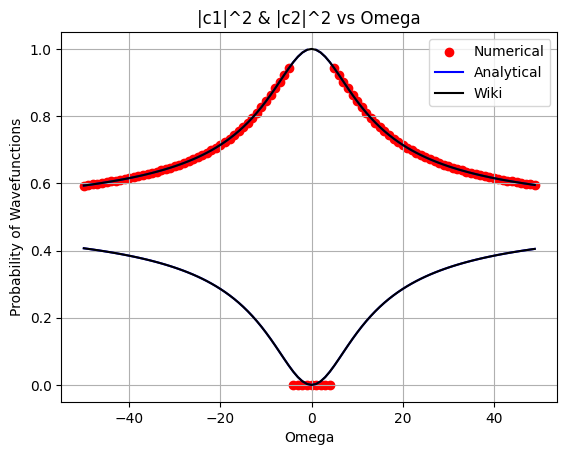

In [148]:
import numpy as np
N=2
times = np.linspace(0.0, 10.0, 500)
psi0 = tensor(fock(N, 1), fock(2,0) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc #check

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]

k1_vals = []
k2_vals =[]

wiki_vals = []
wiki_vals2=[]

for i in range(-50,50):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H = Hamiltonian(wa, wc, Omega, N, False).H_JC
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = mesolve(H, psi0, times, [], [])
# Check higher eigenstates
    num_eigenstates = 4
    c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0))
    # print(psi0)
        #print(i,c[i])
    print(evecs)
    print('--------------')
    #print(c[3])
    # print(H)
            
    c_0_evlt.append(np.abs(c[0][0])**2)
    c_1_evlt.append(np.abs(c[3][0])**2)
    
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")
plt.scatter(Omega_vals, c_0_evlt, label="Numerical", color ="red")
# plt.scatter(Omega_vals, c_1_evlt, color ="red")
#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")
plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(Omega_vals, k1_vals, color ="blue")
#plt.plot(Omega_vals, wiki_vals, label ="wiki", color ="black")
#plt.plot(Omega_vals, wiki_vals2, label ="wiki", color ="black")
plt.plot(Omega_vals, wiki_vals, label ="Wiki", color ="black")
plt.plot(Omega_vals, wiki_vals2, color ="black")
plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Hamiltonian(10, 0.5, 2, 2, False).H_JC

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 5.   0.   0.   0. ]
 [ 0.  -5.   1.   0. ]
 [ 0.   1.   5.5  0. ]
 [ 0.   0.   0.  -4.5]]

# End of Doga's Code

In [18]:
from prettytable import PrettyTable

Hjc = Hamiltonian(1, 1, 2, 10, True).H_JC

matrix = np.real(Hjc.full())
table = PrettyTable()

for row in matrix:
    table.add_row(row)
print(table)

+---------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+
| Field 1 | Field 2 |      Field 3       |      Field 4       |      Field 5       |      Field 6       |      Field 7       |      Field 8       |     Field 9      |     Field 10     |      Field 11     |      Field 12     |      Field 13      |      Field 14      |      Field 15      |      Field 16      |      Field 17      |      Field 18      | Field 19 | Field 20 |
+---------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+--------------------+------

[0j, (0.0014144580778884814+0j), (0.0028286865597844358+0j), (0.004242455729004901+0j), (0.005655536670585593+0j), (0.0070677001179490625+0j), (0.008478716047203556+0j), (0.00988835608980759+0j), (0.011296390888570559+0j), (0.012702592530168706+0j), (0.01410673231014572+0j), (0.015508582625744146+0j), (0.016907915886592746+0j), (0.018304504823329196+0j), (0.019698123281855152+0j), (0.021088544238808106+0j), (0.022475542789495793+0j), (0.02385889393042902+0j), (0.025238373201847616+0j), (0.026613756892920747+0j), (0.02798482190369603+0j), (0.029351345721511872+0j), (0.030713106720120713+0j), (0.03206988419563596+0j), (0.03342145815277952+0j), (0.034767609422036244+0j), (0.036108119809454595+0j), (0.03744277192536652+0j), (0.03877134920776153+0j), (0.04009363647810009+0j), (0.041409419571229476+0j), (0.04271848521944203+0j), (0.044020621314780864+0j), (0.04531561706441543+0j), (0.04660326266943736+0j), (0.04788334947007162+0j), (0.04915567034852653+0j), (0.05042001927844414+0j), (0.05167

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


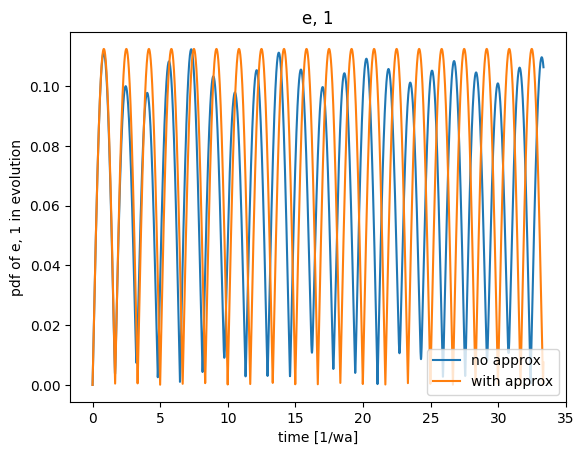

[(1+0j), (0.9999974990573163+0j), (0.9999899969120141+0j), (0.9999774956146255+0j), (0.9999599985629285+0j), (0.9999375105162258+0j), (0.9999100376338678+0j), (0.9998775873737149+0j), (0.9998401686030987+0j), (0.9997977914676183+0j), (0.9997504675233403+0j), (0.9996982096081534+0j), (0.9996410319138109+0j), (0.9995789499647059+0j), (0.9995119805242587+0j), (0.9994401418113887+0j), (0.9993634531560356+0j), (0.9992819352382523+0j), (0.9991956100135775+0j), (0.9991045006791898+0j), (0.9990086316801373+0j), (0.998908028705217+0j), (0.9988027186455434+0j), (0.9986927295713397+0j), (0.9985780907436334+0j), (0.9984588325961301+0j), (0.9983349867173884+0j), (0.9982065858422684+0j), (0.9980736638464214+0j), (0.9979362556325981+0j), (0.9977943971707003+0j), (0.9976481255049335+0j), (0.9974974787165818+0j), (0.9973424958844413+0j), (0.9971832170944854+0j), (0.9970196834163553+0j), (0.9968519368190217+0j), (0.9966800202221832+0j), (0.996503977483308+0j), (0.9963238532603163+0j), (0.996139693020927

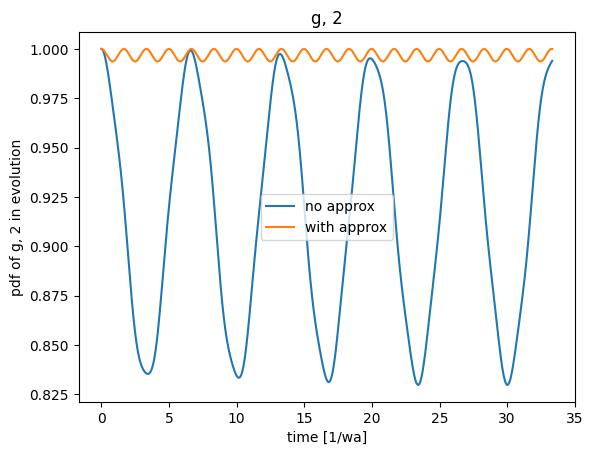

[0j, (0.0017323925525824905+0j), (0.0034647586109428858+0j), (0.005197071301740558+0j), (0.006929306088766522+0j), (0.008661436967349433+0j), (0.010393434418701563+0j), (0.01212527462037677+0j), (0.013856929039051244+0j), (0.015588373759208895+0j), (0.017319580609058655+0j), (0.019050524422860045+0j), (0.020781178662328703+0j), (0.022511516446159903+0j), (0.0242415136101103+0j), (0.025971140598954976+0j), (0.027700374173211025+0j), (0.029429188549526145+0j), (0.031157557810359608+0j), (0.032885456487632456+0j), (0.03461285905166289+0j), (0.03633973975785034+0j), (0.03806607320363183+0j), (0.0397918344599343+0j), (0.04151699855014444+0j), (0.04324154046125784+0j), (0.04496543507595749+0j), (0.04668865721691579+0j), (0.04841118144244177+0j), (0.05013298355954545+0j), (0.05185403960741719+0j), (0.05357432548067691+0j), (0.05529381705478505+0j), (0.05701249039137852+0j), (0.05873032154813486+0j), (0.060447286525509986+0j), (0.06216336197853097+0j), (0.06387852436851306+0j), (0.065592749875

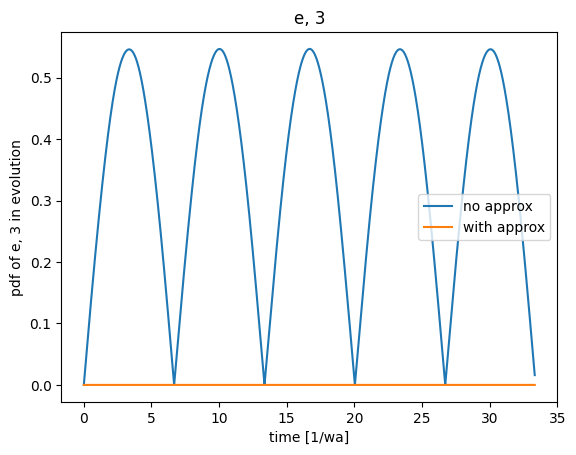

In [9]:
tau = np.linspace(0, 50, 5000)

H_JC_P = Hamiltonian(1.5, 1, 0.2, 10, True).H_JC
H_JC = Hamiltonian(1.5, 1, 0.2, 10, False).H_JC
wa = Hamiltonian(1.5, 1, 0.2, 10, False).wa

psi0 = tensor(basis(10, 2), basis(2, 0))
# psi0 = H_JC.eigenstates()[1][1]

# Perform unitary evolution
resultP = mesolve(H_JC_P, psi0, tau)
result = mesolve(H_JC, psi0, tau)

g = tensor(basis(5, 2), basis(2, 0))
e = tensor(basis(5, 1), basis(2, 1))
extra = tensor(basis(5, 3), basis(2, 1))

# Access the results
statesP = resultP.states
states = result.states
# print(statesP[1])
# Visualize the results
expect_z = [np.sqrt((statesP[i].overlap(e))*np.conjugate(statesP[i].overlap(e))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 1 in evolution')
plt.title('e, 1')
# plt.ylim(0.9, 1.01)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(g))*np.conjugate(statesP[i].overlap(g))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(g))*np.conjugate(states[i].overlap(g))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of g, 2 in evolution')
plt.title('g, 2')
# plt.ylim(0, 0.15)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(extra))*np.conjugate(statesP[i].overlap(extra))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(extra))*np.conjugate(states[i].overlap(extra))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 3 in evolution')
plt.title('e, 3')
# plt.ylim(0, 0.15)
plt.show()

In [76]:
import scipy.fft as ft

freqP = []
freq = []
Peaks = []
Err_RMS = []
om = np.linspace(0.01, 70, 100)

def peak_find (P, t):
    t_peak = []
    for i in range(len(t)-2):
        if P[i+1]>P[i] and P[i+1]>P[i+2]:
            t_peak.append(t[i+1])
            continue
    return t_peak
            
N = 5

for O in om:

    print(O)

    tau = np.linspace(0, 1, 10000)
    wa = 21
    wc = 22

    H_JC_P = Hamiltonian(wa, wc, O, N, True).H_JC
    H_JC = Hamiltonian(wa, wc, O, N, False).H_JC
    # print(H_JC)
    print(H_JC_P == H_JC)
    

    psi0 = tensor(basis(N, 2), basis(2, 0)) #g_2
    
    # psi0 = H_JC.eigenstates()[1][1]

    # Perform unitary evolution
    resultP = mesolve(H_JC_P, psi0, tau, options = {"rtol": 1e-5})

    result = mesolve(H_JC, psi0, tau, options = {"rtol": 1e-5})

    g = tensor(basis(N, 1), basis(2, 0))
    e = tensor(basis(N, 1), basis(2, 1)) #e_1
    e_2 = tensor(basis(N, 2), basis(2, 1))
    # print(e)
    # extra = tensor(basis(5, 3), basis(2, 1))

    # Access the results
    statesP = resultP.states
    states = result.states

    # print(statesP == states)


    expect_z = np.array([(statesP[i].overlap(e))*np.conjugate(statesP[i].overlap(e)) for i in range(len(tau))])
    expect_2 = np.array([((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))])

    d = wa -wc
    F_ana = O/(np.sqrt(d**2 + O**2))
    w_ana = np.sqrt(d**2 + (O)**2)
    analytic = F_ana**2  * np.sin(w_ana*tau/(wa*2))**2


    time, z, z_RWA = tau/wa, np.abs(expect_z), np.abs(expect_2)
    Tau_peak = peak_find(z, time)
    # plt.vlines(Tau_peak, 0, 0.01, lw = 1, color = 'blue')
    # plt.plot(time, z, '.', label = 'without approx')
    # plt.plot(time, z_RWA, '.-', label = 'with approx')
    # # plt.plot(time, analytic, label = 'analytic')
    # plt.legend()
    # plt.xlim(0, 1)
    
    # plt.show()



    
    # print(T_peak)
    f_tau = 1/np.average([Tau_peak[i+1]-Tau_peak[i] for i in range(len(Tau_peak)-1)])



    freq.append(f_tau)
    Peaks.append(np.max(z))


    err_sq = np.sqrt(np.average([(z[i] - z_RWA[i])**2 for i in range(len(time))]))


    Err_RMS.append(err_sq)


    # plt.plot(f, np.abs(I))
    # plt.show()
    # plt.plot(time, np.abs(z))
    # plt.show()


0.01
False


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.7169696969696969
False
1.4239393939393938
False
2.1309090909090904
False
2.8378787878787874
False
3.5448484848484845
False
4.251818181818181
False
4.958787878787878
False
5.665757575757575
False
6.372727272727272
False
7.079696969696969
False
7.786666666666666
False
8.493636363636362
False
9.20060606060606
False
9.907575757575756
False
10.614545454545453
False
11.32151515151515
False
12.028484848484847
False
12.735454545454544
False
13.442424242424241
False
14.149393939393939
False
14.856363636363636
False
15.563333333333333
False
16.27030303030303
False
16.977272727272727
False
17.684242424242424
False
18.39121212121212
False
19.098181818181818
False
19.805151515151515
False
20.51212121212121
False
21.21909090909091
False
21.926060606060606
False
22.633030303030303
False
23.34
False
24.046969696969697
False
24.753939393939394
False
25.46090909090909
False
26.167878787878788
False
26.874848484848485
False
27.581818181818182
False
28.28878787878788
False
28.995757575757576
False
29.70

In [10]:
a = np.array([0, 0, 1, 1, 0])
print(a == 0)

[ True  True False False  True]


In [4]:

tau = np.linspace(0, 5, 100000)
wa = 2
wc = 10

O = 10
N = 5

H_JC_P = Hamiltonian(wa, wc, O, N, True).H_JC
H_JC = Hamiltonian(wa, wc, O, N, False).H_JC
# print(H_JC)
print(H_JC_P == H_JC)


psi0 = tensor(basis(N, 1), basis(2, 0)) #g_1

# psi0 = H_JC.eigenstates()[1][1]

# Perform unitary evolution
# resultP = mesolve(H_JC_P, psi0, tau)
result = mesolve(H_JC, psi0, tau)

g = tensor(basis(N, 1), basis(2, 0))
e = tensor(basis(N, 0), basis(2, 1))
e_2 = tensor(basis(N, 2), basis(2, 1))
# print(e)
# extra = tensor(basis(5, 3), basis(2, 1))

# Access the results
# statesP = resultP.states
states = result.states

# print(statesP == states)


# expect_z = np.array([np.sqrt((statesP[i].overlap(e_2))*np.conjugate(statesP[i].overlap(e_2))) for i in range(len(tau))])
expect_2 = np.array([((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))])

d = wa -wc
F_ana = O/(np.sqrt(d**2 + O**2))
w_ana = np.sqrt(d**2 + (O)**2)
analytic = F_ana**2  * np.sin(w_ana*tau/(wa*2))**2


time, z = tau/wa, np.abs(expect_2)
Tau_peak = peak_find(z, tau)
# plt.vlines(Tau_peak, 0, 0.001, lw = 1, color = 'blue')
plt.plot(time, z, '.', ms = 2, label = 'numerical')
plt.plot(time, analytic, label = 'analytic')
plt.ylabel('|c2|^2 = probability of finding |e, 1>')
plt.xlabel('time [1/wa]')
plt.legend()
# plt.xlim(0, 0.1)

plt.show()

NameError: name 'Hamiltonian' is not defined

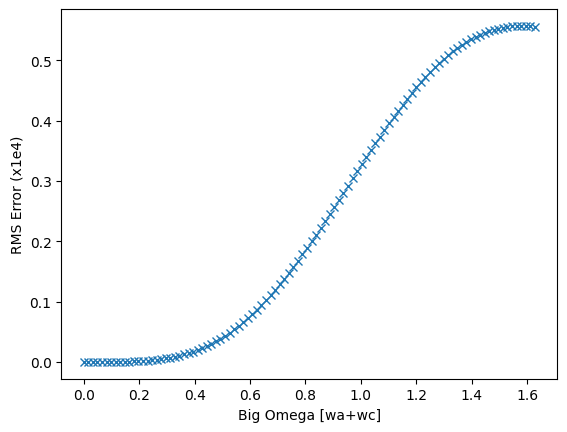

In [77]:
plt.plot(om/(wc+wa), np.array(Err_RMS), 'x')
plt.xlabel('Big Omega [wa+wc]')
plt.ylabel('RMS Error (x1e4)')#0.025
plt.show()

-8


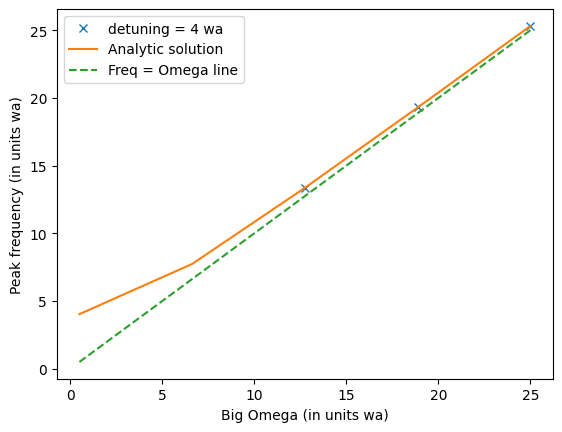

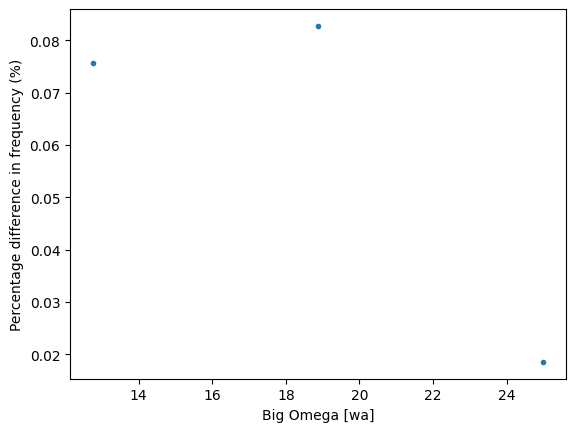

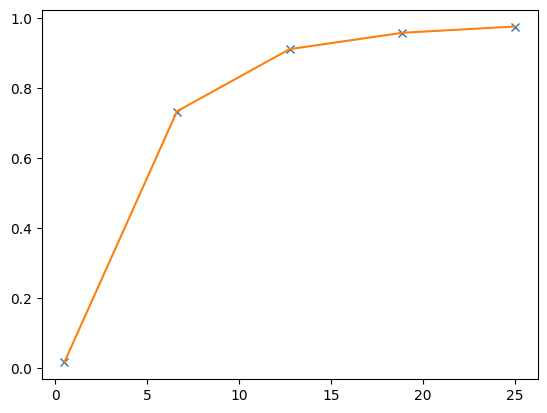

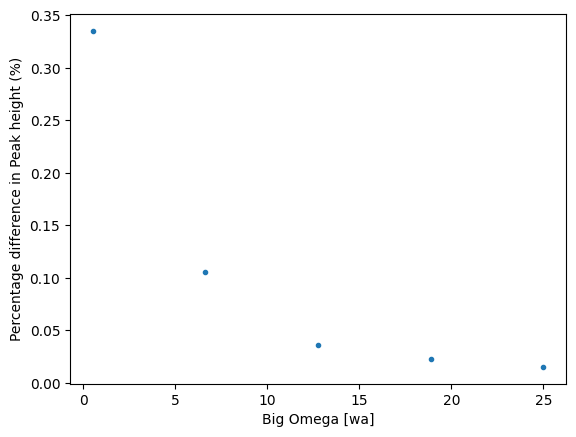

In [12]:
wa = 2
wc = 10
d = wa-wc
print(d)
w_ana = np.sqrt(d**2 + (om)**2)/wa
# print(w_ana)
# plt.plot(om/wa, freqP, '.', label = 'without approximation')
plt.plot(om/wa, np.array(freq)*(2*np.pi), 'x', label = 'detuning = 4 wa')
plt.plot(om/wa, w_ana, label = 'Analytic solution')
plt.plot(om/wa, om/wa, '--', label = 'Freq = Omega line')

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Big Omega (in units wa)')
plt.ylabel('Peak frequency (in units wa)')
plt.legend()
plt.show()

plt.plot(om/wa, 100*np.abs(w_ana - np.array(freq)*(2*np.pi))/w_ana, '.')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Big Omega [wa]')
plt.ylabel('Percentage difference in frequency (%)')
plt.show()


F_ana = (2*om/(2*np.sqrt(d**2 + om**2)))**2
plt.plot(om/wa, np.array(Peaks), 'x')
plt.plot(om/wa, F_ana)
plt.show()
plt.plot(om/wa, 100*np.abs(F_ana - np.array(Peaks))/F_ana, '.')
plt.xlabel('Big Omega [wa]')
plt.ylabel('Percentage difference in Peak height (%)')
plt.show()


In [142]:
a = tensor(destroy(2), qeye(2))
adag = tensor(create(2), qeye(2))
sigma_z = tensor(qeye(4), sigmaz())*(-1)
sigp_a = tensor(destroy(4), create(2))

state = tensor(basis(4, 3), basis(2, 1))

print(state)
print(sigma_z)
# print(e_1)
# print((adag*a) * e_1)
# adag*a

Quantum object: dims=[[4, 2], [1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
Quantum object: dims=[[4, 2], [4, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


In [145]:
tensor(fock(4, 2), fock(2, 1))

Quantum object: dims=[[4, 2], [1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]

In [146]:
tensor(basis(4, 2), basis(2, 1))

Quantum object: dims=[[4, 2], [1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]

Testing commutative

In [22]:
pho = tensor(create(3), qeye(2))
atom = tensor(qeye(3), destroy(2))
state = tensor(basis(3, 1), basis(2, 1))

In [23]:
print(pho*atom)
print(atom*pho)
print(tensor(create(3), destroy(2)))

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         0

In [25]:
Hamiltonian(10, 0.5, 2, 2, False).H_JC

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 5.   0.   0.   0. ]
 [ 0.  -5.   1.   0. ]
 [ 0.   1.   5.5  0. ]
 [ 0.   0.   0.  -4.5]]

Quantum object: dims=[[10, 2], [1, 1]], shape=(20, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[10, 2], [1, 1]], shape=(20, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01440926]
 [0.99989618]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Quantum object: dims=[[10, 2], [1, 1]], shape=(20, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02879165]
 [0.99958543]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Quantum object: dims=[[10, 2], [1, 1]], shap

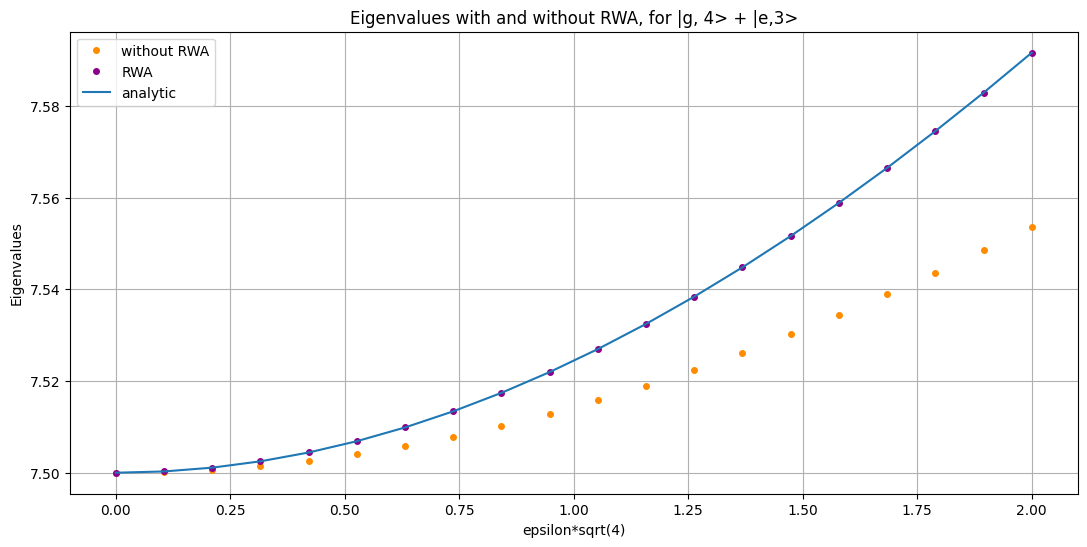

In [533]:
import numpy as np


ep=[]
s=[]
N= 10
e_val_ep_noRwa = []
e_val_ep_RWA = []

i_vals = np.linspace(0, 1, 20)
v = 2
wa = 1

for i in i_vals:
    
    e=i/np.sqrt(N)


    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )

    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())

    H0 = v/wa * a.dag() * a + 1/2 * sigma_z        
    H1 = e/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    H=H

    num_eigenstates = 2*N
        # Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
        # Time evolution
        # Check higher eigenstates

    evals=np.array(evals)

    n=N-1

    H2 = e/2 * (a.dag() + a) * (sm + sm.dag()) 
            
    H3 = H0 + H2
    H3=H3
    evals2=H3.eigenenergies()
    evals2=np.array(evals2)


    s.append(evals2[6]-evals[6])
    ep.append(e)
    e_val_ep_noRwa.append(evals2[8])
    e_val_ep_RWA.append(evals[8])

    evecs = H.eigenstates()[1][6]
    print(evecs)
    

# a = []
# for e in ep:
#     a.append( (-e**2 *3/ (2(1.5+e*np.sqrt(5)+0.5-e*np.sqrt(3))) - e**2 *3/ (2(-5/2+e*np.sqrt(1)+0.5-e*np.sqrt(3)))  -e**2 *3/ (2(1.5-e*np.sqrt(5)+0.5-e*np.sqrt(3))) -e**2 *3/ (2(-5/2-e*np.sqrt(1)+0.5-e*np.sqrt(3))))/2)
    
    

# print(s)

# plt.scatter(np.array(ep)*np.sqrt(N/3),np.array(s), color="red") #missing a factor of approx 11.1
# plt.plot(np.array(ep)*np.sqrt(N/3),a)
# plt.xlabel('epsilon in 1/root(n)')
# plt.grid()
# plt.show()
# #plt.plot(evals[::2],s)



plt.figure(figsize=(13,6))
    
# plt.plot(evals,evals2, 'o',markersize=2,color="black", label="without RWA")
# # plt.plot(evals, evals, label="with RWA")

# plt.xlabel("Eigenvalues with RWA")
# plt.ylabel("differnec in Eigenvalues")
# plt.title("Eigenvalues with and without RWA") 
# plt.legend()
# plt.grid()
# #plt.plot(evals,evals)
# plt.show()

plt.plot(np.array(ep)*np.sqrt(N)*np.sqrt(4),np.array(e_val_ep_noRwa), 'o',markersize=4,color="darkorange", label="without RWA")
plt.plot(np.array(ep)*np.sqrt(N)*np.sqrt(4),e_val_ep_RWA, 'o',markersize=4,color="darkmagenta", label="RWA")
plt.plot(np.array(ep)*np.sqrt(N)*np.sqrt(4), (4-0.5)*2+np.sqrt(4*np.array(ep)**2/4 + ((wa-v)/wa)**2/4), label = 'analytic')
# plt.plot(evals, evals, label="with RWA")

plt.xlabel("epsilon*sqrt(4)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues with and without RWA, for |g, 4> + |e,3>") 
plt.legend()
plt.grid()
#plt.plot(evals,evals)
plt.show()

[0.44721359549995776, 0.44721359549995776, 0.6324555320336755, 0.6324555320336755, 0.774596669241483, 0.774596669241483, 0.8944271909999153, 0.8944271909999153, 0.9999999999999991, 0.9999999999999991, 1.0954451150103317, 1.0954451150103317, 1.1832159566199225, 1.1832159566199225, 1.264911064067352, 1.264911064067352, 1.3416407864998732, 1.3416407864998732, 1.414213562373094, 1.414213562373094]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


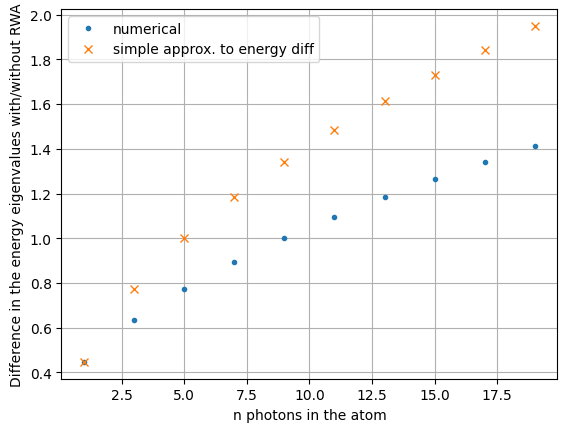

In [437]:
import numpy as np

N= 20
e=2/np.sqrt(N)

n=[]
for i in range(1,N):
    n.append(i)


times = np.linspace(0.0, 20.0, 800)
psi0 = tensor(fock(N, 0), fock(2,1) )

psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())

H0 = 1 * a.dag() * a + 1/2 * sigma_z        
H1 = e/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
H2 = e/2 * (a.dag() + a) * (sm + sm.dag()) 
H = H0 + H1
H=H

num_eigenstates = 2*N
    # Find the eigenstates of the Hamiltonian
evals, evecs = H.eigenstates()
    # Time evolution
    # Check higher eigenstates

big_truth = []




for i in range(N):
    if i % 2 == 1:
        continue
    small_truth = np.full(2*N, True)
    small_truth[i+1] = False
    small_truth[i+2] = False
    big_truth.append((small_truth))

# print(big_truth)

e_gap=[]
for bt in big_truth:
    for i in range(0,len(evals)):
        truth_arr_i = np.array((evecs[i].full())).flatten() == 0
        for j in range(0,len(evals)):
            truth_arr_j = np.array((evecs[j].full())).flatten() == 0
            if np.all(truth_arr_i==bt) and np.all(truth_arr_j==bt) and evecs[i]!=evecs[j]:
                e_gap.append(np.abs(evals[j]-evals[i]))
                break
  

print((e_gap))

print(n)

plt.plot(np.array(n[::2]), np.array(e_gap[::2]), '.',label = 'numerical')
plt.plot(np.array(n[::2]), e*np.sqrt(np.array(n[::2])), 'x', label = 'simple approx. to energy diff')
plt.xlabel('n photons in the atom')
plt.ylabel('Difference in the energy eigenvalues with/without RWA')
plt.legend()
plt.grid()

In [122]:
state = tensor(basis(2,1), basis(2, 0))
state

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [129]:
tensor(qeye(3), sigmax())

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]